In [1]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [2]:
from atl_module.bathymetry_extraction import icesat_bathymetry
from atl_module.utility_functions import geospatial_functions
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import show as rioshow
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd

# florida error improvement

In [3]:
flpts = gpd.read_file("../data/test_sites/florida_keys/kriging_pts/")

In [4]:
with rio.open("../data/test_sites/florida_keys/compressed.tif") as error_improvement:
    data = error_improvement.read(1, masked=True)
    transform = error_improvement.transform
    crs = error_improvement.crs

ValueError: Invalid unit (angle) with dimension

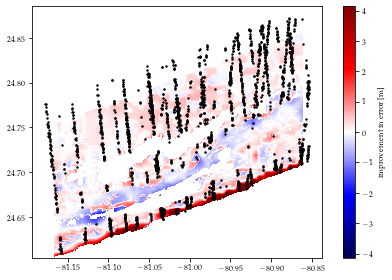

In [5]:
fig, ax = plt.subplots()
imageartist = ax.imshow(
    data,
    cmap="seismic",
    vmax=4.14,
    vmin=-4.14,
)
cbar = fig.colorbar(imageartist, label="improvement in error [m]")
ax.clear()
# switch the
rioshow(data, transform=transform, cmap="seismic", vmax=4.14, vmin=-4.14, ax=ax)
flpts.to_crs(crs).plot(ax=ax, label="ICESat-2 points", markersize=2, color="black")
# sb = ScaleBar(1,units='angle')
# ax.add_artist(sb)
fig.tight_layout()
fig.savefig("../data/gl_pres_data/florida_error.png", bbox_inches="tight")

# Oahu 8 improvement

In [3]:
oahu8pts = gpd.read_file("../data/test_sites/oahu8/kriging_pts/")

In [4]:
with rio.open("../data/test_sites/oahu8/compressed2.tif") as error_improvement:
    data = error_improvement.read(1, masked=True)
    transform = error_improvement.transform
    crs = error_improvement.crs

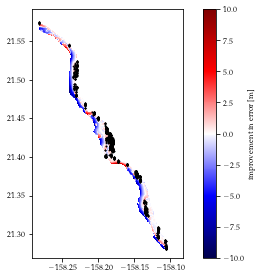

In [5]:
fig, ax = plt.subplots()
imageartist = ax.imshow(
    data,
    cmap="seismic",
    vmax=10,
    vmin=-10,
)
cbar = fig.colorbar(imageartist, label="improvement in error [m]")
ax.clear()
rioshow(
    data,
    transform=transform,
    ax=ax,
    cmap="seismic",
    vmax=10,
    vmin=-10,
)
fig.savefig("../data/gl_pres_data/oahu8_no_points.png", bbox_inches="tight")
oahu8pts.to_crs(crs).plot(ax=ax, label="ICESat-2 points", markersize=0.5, color="black")
fig.tight_layout()
fig.savefig("../data/gl_pres_data/oahu8.png", bbox_inches="tight")